In [1]:
import matplotlib.pyplot as plt

In [2]:
import dendrotweaks as dd

In [3]:
import os
cwd = os.getcwd()
path_to_data = os.path.join(cwd, 'data')

In [4]:
model = dd.Model(name='Park_2019', 
                 path_to_data=path_to_data)

In [5]:
model.load_data()

Connecting tree.
  Elapsed time: 0.09 seconds
Extended 44 nodes.
Connecting tree.
Building sections in NEURON...
52 sections created.
Connecting tree.
Adding mechanism vecstim to model...
Using precompiled mechanism "vecstim"
Loaded mechanism "vecstim"
Mechanism vecstim loaded to NEURON.

Adding mechanism AMPA_NMDA to model...
Using precompiled mechanism "AMPA_NMDA"
Loaded mechanism "AMPA_NMDA"
Mechanism AMPA_NMDA loaded to NEURON.

Adding mechanism Leak to model...
Using precompiled mechanism "Leak"
Loaded mechanism "Leak"
Mechanism Leak loaded to NEURON.

Adding mechanism AMPA to model...
Using precompiled mechanism "AMPA"
Loaded mechanism "AMPA"
Mechanism AMPA loaded to NEURON.

Adding mechanism GABAa to model...
Using precompiled mechanism "GABAa"
Loaded mechanism "GABAa"
Mechanism GABAa loaded to NEURON.

Adding mechanism NMDA to model...
Using precompiled mechanism "NMDA"
Loaded mechanism "NMDA"
Mechanism NMDA loaded to NEURON.

Saved content to /home/roman/Documents/code/DendroT

/home/roman/anaconda3/envs/dendrotweaks/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating Na.mod into /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/Na/x86_64/Na.c
Thread Safe


 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special
Compiled mod files from "/home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/Na"
Loaded mechanism "Na"
Mechanism Na loaded to NEURON.

Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/Kv.py
Registering Kv from Kv in /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python
Importing class Kv from module Kv.py
Mechanism Kv added to model.
Adding mechanism Kv to model...
Compiling mechanism "Kv"...


/home/roman/anaconda3/envs/dendrotweaks/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating Kv.mod into /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/Kv/x86_64/Kv.c
Thread Safe


/home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/Kv
Mod files: "./Kv.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../Kv.mod
 -> Compiling Kv.c
 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special
Compiled mod files from "/home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/Kv"
Loaded mechanism "Kv"
Mechanism Kv loaded to NEURON.

Connecting tree.
Could not set global parameter temp_Na to 23.
Could not set global parameter q10_Na to 2.3.
Could not set global parameter Ra_Kv to 0.02.
Could not set global parameter Rb_Kv to 0.006.
Could not set global parameter temp_Kv to 23.
Could not set global parameter q10_Kv to 2.3.
IClamp added to sec ••0 at loc 0.5.


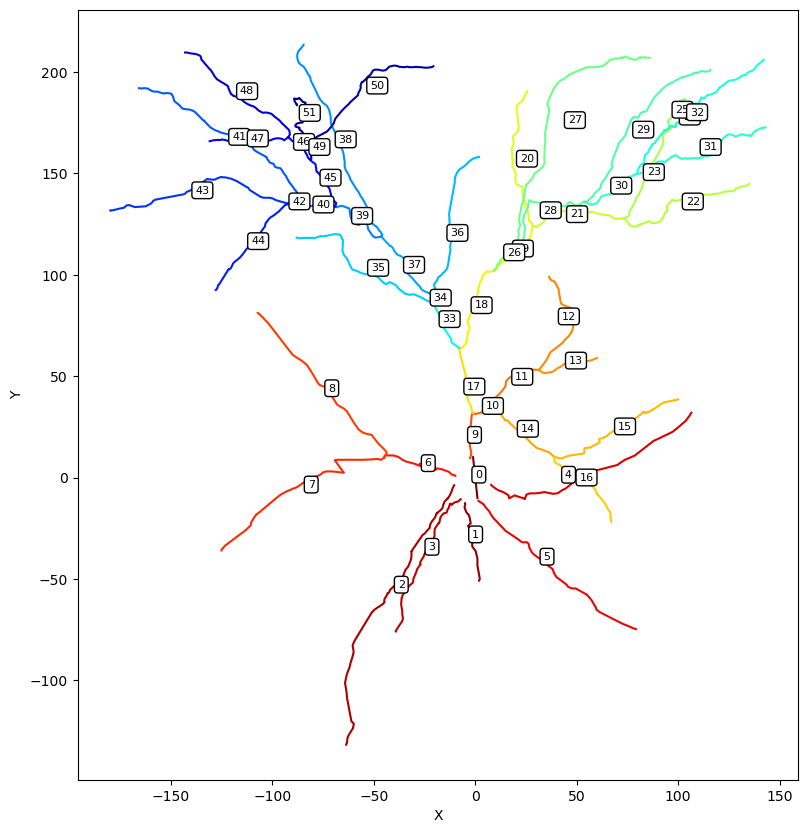

In [6]:
model.sec_tree.plot(annotate=True)

In [7]:
model.params

{'cm': {'all': uniform({'value': 1}), 'soma': uniform({'value': 2})},
 'gbar_Leak': {'all': uniform({'value': 0.0001})},
 'gbar_Na': {'all': uniform({'value': 0.03}),
  'soma': uniform({'value': 0.05})},
 'gbar_Kv': {'all': uniform({'value': 0.003}),
  'soma': uniform({'value': 0.005})},
 'Ra': 100,
 'ena': 60,
 'ek': -80,
 'e_Leak': -79,
 'Rma_Na': 0.182,
 'Rmb_Na': 0.14,
 'v12m_Na': -30,
 'qm_Na': 9.8,
 'Rhb_Na': 0.0091,
 'Rha_Na': 0.024,
 'v12ha_Na': -45,
 'v12hb_Na': -70,
 'qh_Na': 5,
 'v12hinf_Na': -60,
 'qhinf_Na': 6.2,
 'temp_Na': 23,
 'q10_Na': 2.3,
 'Ra_Kv': 0.02,
 'Rb_Kv': 0.006,
 'v12_Kv': 25,
 'q_Kv': 9,
 'temp_Kv': 23,
 'q10_Kv': 2.3}

Got data for v in range -100.0 to 100.0 at 37°C
Got data for v in range -100.0 to 100.0 at 37°C


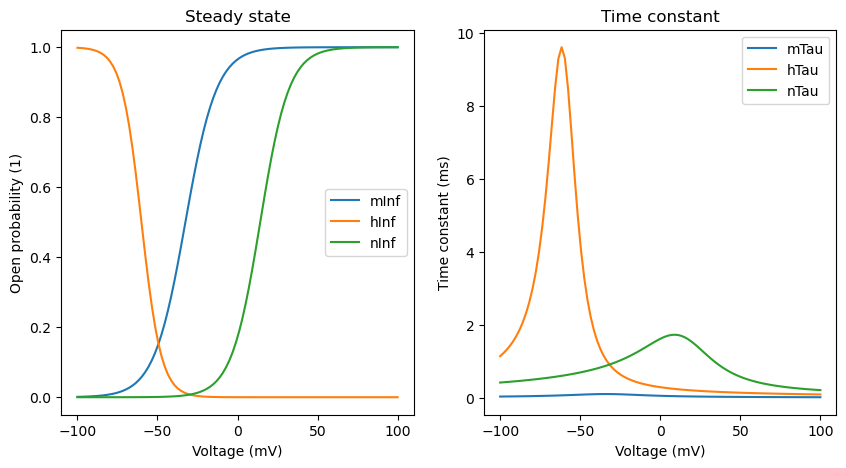

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
model.mechanisms['Na'].plot_kinetics(ax)
model.mechanisms['Kv'].plot_kinetics(ax)

In [9]:
model.set_global_param('temperature', 37)
model.set_global_param('v_init', -79)

In [10]:
t, v, _ = model.simulator.run(duration=300)

In [11]:
model.populations

{'AMPA': {'AMPA_0': <Population(AMPA_0, N=10)>},
 'NMDA': {},
 'AMPA_NMDA': {},
 'GABAa': {}}

(-100.0, 60.0)

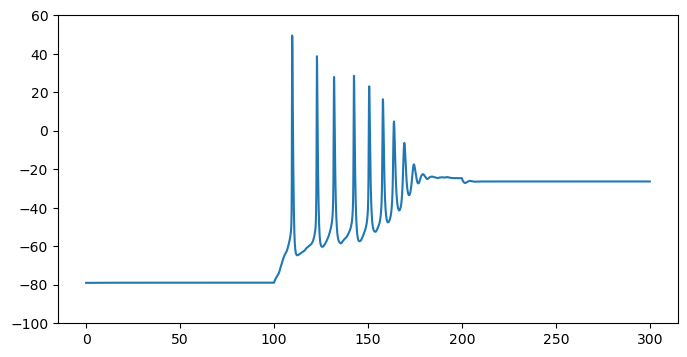

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t[0], v[0])
ax.set_ylim(-100, 60)